# **Tarea Semanal 3**: *Análisis de Fourier: FFT, desparramo, interpolación y ventaneo.*

## Alumna: Salgado, Victoria Jazmín 
### Análisis y Procesamiento de Señales - 2do Cuatrimestre 2025

## **Resumen**
En esta tarea semanal se trabajó con diferentes conceptos y fenómenos que aparecen a partir de la transformada discreta de Fourier. 
Se utilizó el software Spyder mediante WSL.

## **Introducción**

Como se indicó previamente, en esta tarea semanal aparecen, a partir de la Transformada Discreta de Fourier (por sus siglas en inglés, DFT) varios fenómenos de interés en el procesamiento de señales.

La DFT surge a partir de las limitaciones computacionales que presenta la DTFT (*Discrete Time Fourier Transform*), la cual se define como la relación entre una secuencia discreta pero infinita en el tiempo $x[n]$ y su transformada $X(\omega)$:

$$
X(\omega) \triangleq \sum_{n=-\infty}^{\infty} x[n] \, e^{-j \omega n} \tag{1}
$$

Ésta es una herramienta esencial para conocer la respuesta en frecuencia de un sistema de tiempo discreto. Teniendo en cuenta que las funciones $e^{-j \omega n}$ son ortogonales, el cálculo de la transformada puede interpretarse como una proyección de la señal sobre senoidales complejas, lo que revela qué frecuencias la componen.

Sin embargo, $X(\omega)$ es una función continua en la variable de frecuencia $\omega$ (y periódica con período $2\pi$), lo que genera dificultades al momento de implementarla en forma computacional.

La DFT surge como una solución práctica al restringir la señal original a una cantidad finita de muestras $N$, muestreando la DTFT en $N$ puntos igualmente espaciados en el rango $0 \leq \omega < 2\pi$:

$$
X[k] \triangleq \sum_{n=0}^{N-1} x[n] \, e^{-j \frac{2\pi}{N} k n}, \quad k = 0,1,2,\dots,N-1 \tag{2}
$$

A partir de lo detallado anteriormente, aparece el concepto de resolución espectral, que indica la separación entre los bins de frecuencia (dicho de otra manera, los valores sobre el eje x que puede tomar). Está dada como $\triangle f = \frac{2\pi}{N} [\frac{rad}{muestra}] = \frac{f_S}{N} [\frac{Hz}{muestra}]$, como resultado de dividir el circulo que representa todas las frecuencias posibles (imaginando la señal como un fasor que gira con una frecuencia angular $2\pi f$) entre las N muestras de DFT. 

Si la frecuencia (o frecuencias) que componen a la señal coinciden con alguno de los *bins* de frecuencia obtenidos (cada una de las divisiones obtenidas anteriormente; cada $\triangle f$), entonces la DFT logrará capturar toda la energía en ese bin. 
Sin embargo, puede suceder que alguna de estas frecuencias no coincida con ningun bin, y la DFT no pueda capturar esa energía en un solo punto, por lo que deberá repartirse entre varios bins, originando el fenómeno de **desparramo espectral**. 

Aunque la DFT pueda calcularse directamente, en la práctica se utilizará la FFT (*Fast Fourier Transform*), que es un algoritmo que resulta más eficiente computacionalmente pero que obtiene los mismos resultados para la respuesta en frecuencia, aprovechando propiedades de simetría y periodicidad de la DFT.

Otro concepto importante en este trabajo es la relación entre energía, potencia y espectro de potencias. La identidad de Parseval garantiza que la energía total de la señal puede calcularse indistintamente en el dominio temporal o frecuencial:

$$
\sum_{n=0}^{N-1} |x[n]|^2 = \frac{1}{N} \sum_{k=0}^{N-1} |X[k]|^2
$$

Esto asegura que la energía (y por ende la potencia media de la señal) puede calcularse de forma consistente en ambos dominios.

A su vez, la Densidad Espectral de Potencia o PSD (Por sus siglas en inglés, *Power Spectrum Density*), describe cómo se distribuye la potencia de una señal en el dominio de la frecuencia. En el caso de señales determinísticas de longitud finita, como en el caso de este trabajo, se calcula utilizando el periodograma, definido como

$$
P[k] = \frac{1}{N}|X[k]|^2
$$

donde $X[k]$ es la DFT de la señal. Su representación gráfica permite observar cómo está repartida la potencia entre diferentes frecuencias. 

## **Desarrollo y Análisis**

A partir de una senoidal de frecuencia $f_0 = k_0\cdot\frac{f_s}{N}=k_0\cdot\triangle$, con potencia normalizada (es decir energía o varianza unitaria) se pide:

- Sea $k_0$
    - $\frac{N}{4}$ 
    - $\frac{N}{4}+0.25$ 
    - $\frac{N}{4}+0.5$

    Graficar las tres densidades espectrales de potencia (PDS's) y discutir cuál es eñ efecto en el espectro visualizado.  En base a la teoría estudiada, discutir la razón por la cual una señal senoidal tiene un espectro tan diferente respecto a otra de muy pocos Hertz de diferencia. 

- Verificar la potencia unitaria de cada PSD, puede usar la identidad de Parseval.

- Repetir el experimento mediante la técnica de zero padding. Probar agregando un vector de 9*N ceros al final. Discuta los resultados obtenidos.

Se comienza por sintetizar la señal de acuerdo a lo pedido

Text(0.5, 1.0, 'Gráfico 1: PSD para k0 (dB)')

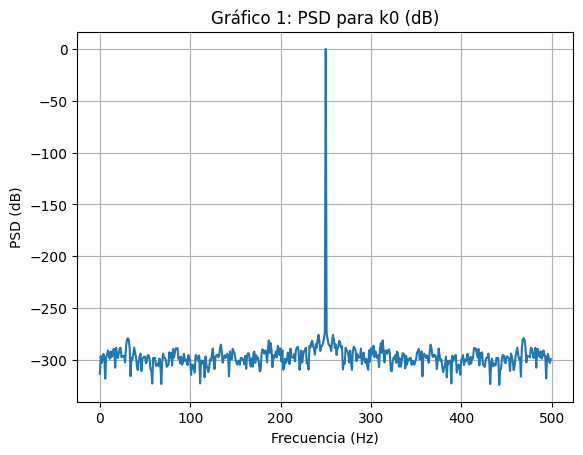

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft as fft

# Parámetros de la señal
fs = N = 1000
df = fs/N #Resolución espectral
Ts = 1/fs #Resolución temporal

k0 = N/4
k1 = N/4 + 0.25
k2 = N/4 + 0.5

f0 = k0 * df
f1 = k1 * df
f2 = k2 * df 

def mi_funcion_sen(vmax=1, dc=0, ff=1, ph=0, N=1000, fs=2):
    Ts = 1/fs
    tt = np.arange(0, N*Ts, Ts)
    xx = vmax * np.sin(2 * np.pi * ff * tt + ph) + dc
    return tt, xx

tt, xx = mi_funcion_sen(vmax=np.sqrt(2), dc=0, ff=f0, ph=0, N=N, fs=fs)

X = np.fft.fft(xx)
bins = np.arange(0, N) * df

#DSP |DFT|²
#PSD con normalización
half = N//2
Pxx = (1/N) * np.abs(X[:half])**2
Pxx[1:-1] *= 2  # corrige por simetría, para conservar energia total
freqs = np.arange(0, half) * df

plt.figure()
plt.plot(freqs, 10*np.log10(Pxx/np.max(Pxx))) #normalizo por el máximo para tener el pico en 0dB
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD (dB)')
plt.grid(True)
plt.title('Gráfico 1: PSD para k0 (dB)')

Para cada una de las señales senoidales sintetizadas con diferentes frecuencias (f0, f1 y f2) se graficaron las Densidades Espectrales de Potencia en Decibeles. 

En el caso de la señal de frecuencia f0, se observa que la FFT, y por consecuencia la PSD, es capaz de captar la energía de la frecuencia en un solo bin. Como la resolución espectral es de 1Hz, si la señal está compuesta por frecuencias que sean múltiplo de este número (en este caso 250Hz, que es múltiplo de 1Hz), la energía se verá contenida en un solo bin. 

Resulta interesante observar en el gráfico 1 que además del pico correspondiente a la frecuencia de la señal, puede verse el piso de ruido del sistema utilizado. Éste, aunque visible en el gráfico, es muy pequeño, teniendo en cuenta que esta alrededor de 250dB por debajo de la frecuencia de la señal, lo que es un valor millones de veces más chico. Aquí se ve la utilidad de medir en dB, ya que es posible representar en un mismo grafico valores que difieren enormemente en magnitud.

Text(0.5, 1.0, 'Gráfico 2: PSD para k1 (dB)')

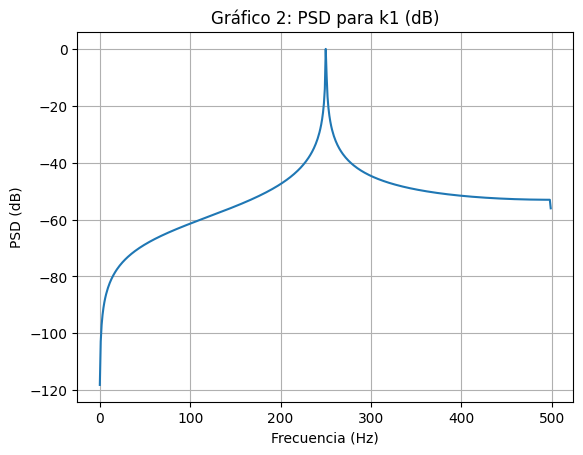

In [12]:
tt , yy = mi_funcion_sen(vmax=np.sqrt(2), dc=0, ff=f1, ph=0, N=N, fs=fs)
Y = np.fft.fft(yy)
bins = np.arange(0, N) * df

#DSP |DFT|²
# PSD con normalización
half = N//2
Pyy = (1/N) * np.abs(Y[:half])**2
Pyy[1:-1] *= 2  # corrige por simetría, para conservar energia total
freqs = np.arange(0, half) * df

plt.figure()
plt.plot(freqs, 10*np.log10(Pyy/np.max(Pyy)))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD (dB)')
plt.grid(True)
plt.title('Gráfico 2: PSD para k1 (dB)')

Para el gráfico 2 se calculó la PSD de una señal senoidal de frecuencia f1 = 250,25Hz. 

Es posible ver una diferencia considerable respecto al gráfico 1. El espectro de potencias muestra componentes adicionales a la correspondiente a la frecuencia f1. Ésto se debe, justamente, al fenómeno de desparramo espectral descrito anteriormente. La frecuencia de la señal no es un múltiplo de la resolución espectral de 1Hz, y por este motivo la energía de la señal aparecerá desparramada entre diferentes bins de frecuencia.

Es interesante ver, gracias al gráfico de densidad espectral en dB, que el desparramo no es completamente simétrico a un lado y otro de la frecuencia "central". Se realiza la interpretación a continuación.

Text(0.5, 1.0, 'Gráfico 3: PSD para k2 (dB)')

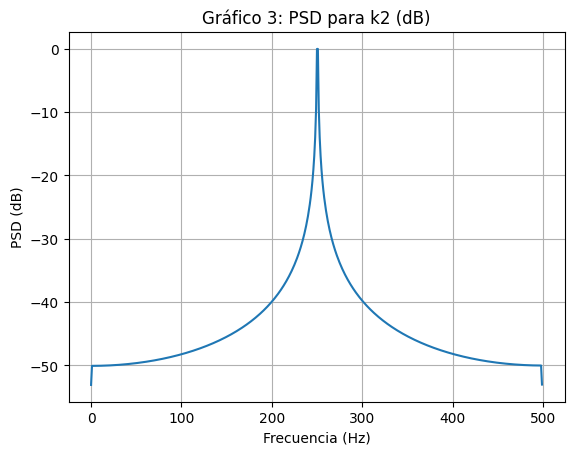

In [13]:
tt , zz = mi_funcion_sen(vmax=np.sqrt(2), dc=0, ff=f2, ph=0, N=N, fs=fs)
Z = np.fft.fft(zz)
bins = np.arange(0, N) * df

#DSP |DFT|²
# PSD con normalización
half = N//2
Pzz = (1/N) * np.abs(Z[:half])**2
Pzz[1:-1] *= 2  # corrige por simetría, para conservar energia total
freqs = np.arange(0, half) * df

plt.figure()
plt.plot(freqs, 10*np.log10(Pzz/np.max(Pzz)))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD (dB)')
plt.grid(True)
plt.title('Gráfico 3: PSD para k2 (dB)')

Para el gráfico 3 se calculó la DSP de una señal senoidal de frecuencia f2 = 250,5Hz.

En este caso puede observarse gráficamente que el desparramo sí es simétrico respecto de la frecuencia real de la señal. 
La interpretación es que 250,5 queda a la mitad exacta entre bins de frecuencia, por lo que el desplazamiento será hacia ambos lados por igual, mientras que en el caso de 250,25 este no es el caso, por lo que se observa una pequeña inclinacion hacia un lado del espectro.

A continuación, se procede a verificar la potencia unitaria de las señales sintetizadas. 
La potencia media de una señal senoidal puede calcularse como $P=\frac{A²}{2}$. Para que la potencia unitaria sea P=1, es necesario que la amplitud sea $A=\sqrt2$.
Por otro lado, se utiliza la identidad de Parseval para calcular la potencia desde el dominio de la frecuencia mediante la PSD.
La identidad de Parseval garantiza que la energía de una señal se conserva independientemente de si se la analiza desde el espectro temporal o frecuencial.
De esta manera, la potencia unitaria también puede verificarse sumando todos los valores de la densidad espectral de potencia (PSD), que corresponde al lado derecho de la identidad. Si la PSD está normalizada, la suma de sus valores coincide con la potencia media de la señal en el dominio temporal, confirmando que  es unitaria.

In [14]:
def parseval(señal, dft, N):
    lado_tiempo = np.sum(np.abs(señal)**2)
    lado_frecuencia = (1/N) * np.sum(np.abs(dft)**2)  #Calculo la PSD
    return lado_tiempo, lado_frecuencia

print("Energía de la señal con f0 (se imprimen ambos lados de Parseval):")
lt, lf = parseval(xx, X, N)
print("lado tiempo:", lt)
print("lado frecuencia (PSD):", lf)

print("\nEnergía de la señal con f1 (se imprimen ambos lados de Parseval):")
lt, lf = parseval(yy, Y, N)
print("lado tiempo:", lt)
print("lado frecuencia (PSD):", lf)

print("\nEnergía de la señal con f2 (se imprimen ambos lados de Parseval):")
lt, lf = parseval(zz, Z, N)
print("lado tiempo:", lt)
print("lado frecuencia (PSD):", lf)


Energía de la señal con f0 (se imprimen ambos lados de Parseval):
lado tiempo: 1000.0000000000002
lado frecuencia (PSD): 1000.0000000000001

Energía de la señal con f1 (se imprimen ambos lados de Parseval):
lado tiempo: 998.9999999999995
lado frecuencia (PSD): 998.9999999999995

Energía de la señal con f2 (se imprimen ambos lados de Parseval):
lado tiempo: 1000.0000000000003
lado frecuencia (PSD): 1000.0000000000005


Como se indicó anteriormente la identidad de Parseval refiere a la energía total de la señal, que es calculable por ser finita. Para obtener la potencia media, se normaliza la energía por la cantidad de muestras según $P=\frac{E}{N}$, en este caso $P=\frac{1000}{1000}=1$ veríficandose la potencia unitaria deseada.

(0.0, 500.0)

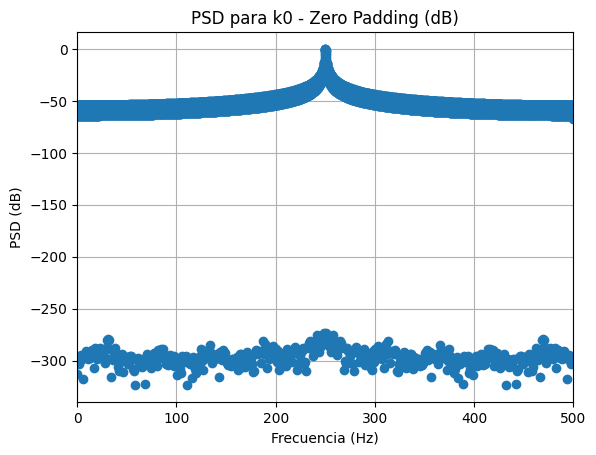

In [15]:
# Zero padding
Npad = 10 * N  # múltiplo de N para mayor claridad
xx_pad = np.zeros(Npad)
xx_pad[:N] = xx   # copiar la señal original

# FFT con zero padding
X_pad = np.fft.fft(xx_pad)
df_pad = fs / Npad  # nueva resolución espectral
half_pad = Npad // 2
freqs_pad = np.arange(half_pad) * df_pad  # eje de frecuencias hasta Nyquist


# PSD con normalización y corrección por simetría
Pzp0 = (1/Npad) * np.abs(X_pad[:half_pad])**2
Pzp0[1:-1] *= 2  # corrige por simetría para conservar energía total

# Graficar PSD en dB
plt.figure()
plt.plot(freqs_pad, 10*np.log10(Pzp0/np.max(Pzp0)), 'o')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD (dB)')
plt.grid(True)
plt.title('PSD para k0 - Zero Padding (dB)')
plt.xlim([0, fs/2])

(0.0, 500.0)

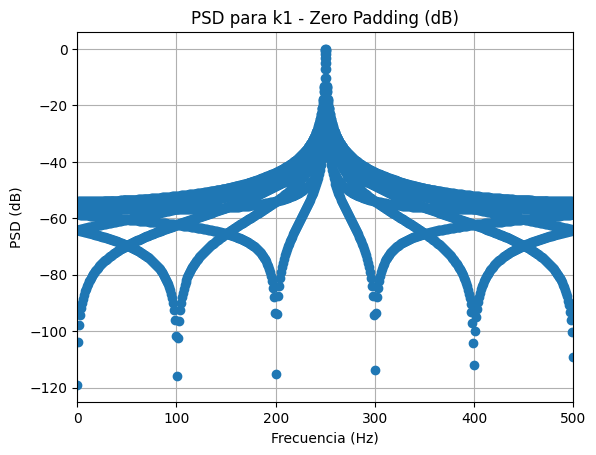

In [16]:
# Zero padding
Npad = 10 * N  # usar múltiplo de N para mayor claridad
yy_pad = np.zeros(Npad)
yy_pad[:N] = yy   # copiar la señal original

# FFT con zero padding
Y_pad = np.fft.fft(yy_pad)

# Grilla de frecuencias
bins_pad = np.arange(Npad) * (fs / Npad)
half_pad = Npad // 2
freqs_pad = bins_pad[:half_pad]


# PSD con normalización y corrección por simetría
Pzp1 = (1/Npad) * np.abs(Y_pad[:half_pad])**2
Pzp1[1:-1] *= 2  # corrige por simetría para conservar energía total

# Graficar PSD en dB
plt.figure()
plt.plot(freqs_pad, 10*np.log10(Pzp1/np.max(Pzp1)), 'o')
plt.title("PSD para k1 - Zero Padding (dB)")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD (dB)')
plt.grid(True)
plt.xlim([0, fs/2])


(0.0, 500.0)

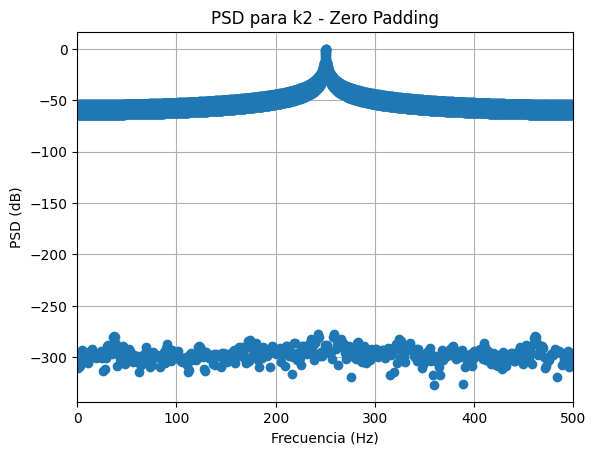

In [17]:
# Zero padding
Npad = 9*N + N  
zz_pad = np.zeros(Npad)
zz_pad[:N] = zz   # copiar la señal original

# FFT con zero padding
Z_pad = np.fft.fft(zz_pad)

# Grilla de frecuencias
bins_pad = np.arange(Npad) * (fs / Npad)
half_pad = Npad // 2
freqs_pad = bins_pad[:half_pad]

# PSD con normalización y corrección por simetría
Pzp2 = (1/Npad) * np.abs(Z_pad[:half_pad])**2
Pzp2[1:-1] *= 2  # corrige por simetría para conservar energía total

# Graficar PSD en dB
plt.figure()
plt.plot(freqs_pad, 10*np.log10(Pzp2/np.max(Pzp2)), 'o')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD (dB)')
plt.title('PSD para k2 - Zero Padding')
plt.grid(True)
plt.xlim([0, fs/2])

Al aplicar zero padding, se extiende artificialmente la duración de la señal añadiendo ceros al final. El efecto principal del zero padding es que la FFT evalúa la DTFT en un mayor número de puntos, generando una grilla de frecuencias más densa. Esto no agrega información nueva al espectro, pero permite visualizar mejor su forma.

Como la señal fue truncada a $N$ muestras, en el dominio temporal está siendo multiplicada por una ventana rectangular. La transformada de esta ventana es una función sinc (ajustada), y por lo tanto, en el dominio frecuencial, la señal ideal (un delta en la frecuencia de la senoidal) aparece convolucionada con esa sinc. Esto explica la forma ensanchada del pico y el desparramo espectral observado. No se grafica la interpolación por la función sinc debido a que el gráfico no sería legible.

Cabe destacar que lo descrito anteriormente ocurre en todos los casos: siempre que se trunca una señal se la está ventaneando implicitamente con una ventana rectangular. Como resultado de la convolución mencionada, se obtiene una función que tendrá ceros en multiplos enteros de la resolucion de frecuencia. Cuando la frecuencia de la señal no está exactamente donde la función interpolante se anula, se evidencia el desparramo espectral. En el caso de f0, la frecuencia estaba exactamente en un cero de la función interpolante, por lo que no se observa el fenómeno mencionado. 

Con el zero padding se logra muestrear esa convolución en más puntos, de modo que la función sinc se hace más evidente y puede observarse mejor la distribución de la energía alrededor de la frecuencia principal.

## **Bonus**
Calcule la respuesta en frecuencia de los sistemas LTI de la TS2.
- $y[n] = 3 \cdot 10^{-2} \cdot x[n] + 5 \cdot 10^{-2} \cdot x[n-1] + 3 \cdot 10^{-2} \cdot x[n-2] + 1.5 \cdot y[n-1] - 0.5 \cdot y[n-2]$
- $y[n]=x[n]+3⋅x[n−10]$
- $y[n]=x[n]+3⋅y[n−10]$

La respuesta en frecuencia de un sistema LTI será la Transformada Discreta de Fourier de su respuesta al impulso. 
La respuesta al impuslo fue calculada en la TS2 

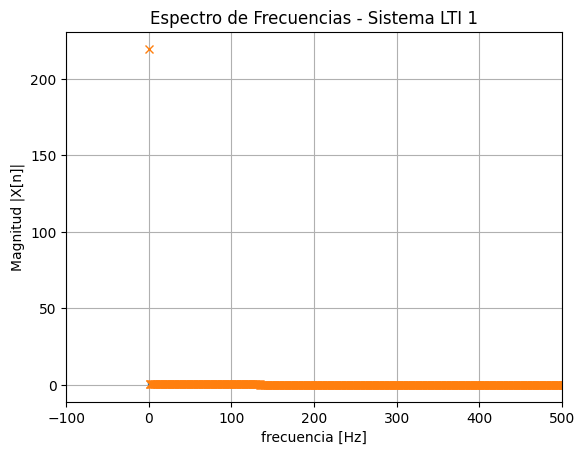

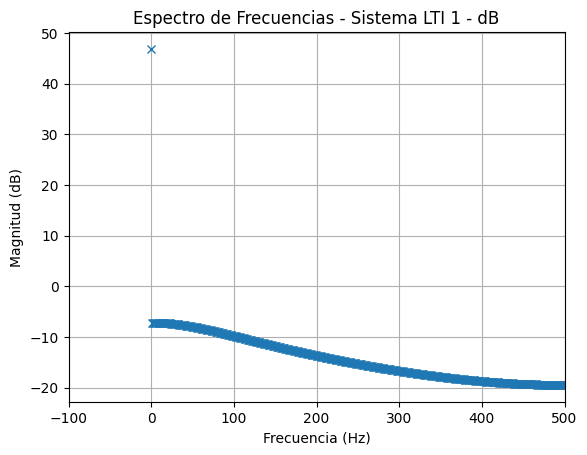

In [18]:
#respuesta al impulso ecuacion 1 

#impulso
Ts = 1/fs
tp = np.arange(0, N*Ts, Ts)
P = np.zeros(N, dtype = float)
start = 0
P[start] = 1

#para ver el impulso
plt.figure(6)
plt.plot(tt, P)
plt.grid(True)

H = np.zeros(N, dtype=float)
for n in range(N):
        if n==0:
            H[n] = 3e-2*P[n] 
        elif n==1:
            H[n] = 3e-2*P[n] + 5e-2*P[n-1] + 1.5*H[n-1]
        else:     
            H[n] = 3e-2*P[n] + 5e-2*P[n-1] + 3e-2*P[n-2] + 1.5*H[n-1] - 0.5*H[n-2]

#respuesta en frecuencia - DFT respuesta al impulso
Hf = np.fft.fft(H)      
bins_impulso = np.arange(0, N)*df
plt.plot(bins_impulso, np.abs(Hf), 'x') 
plt.grid(True)
plt.title("Espectro de Frecuencias - Sistema LTI 1")
plt.xlabel('frecuencia [Hz]') 
plt.ylabel('Magnitud |X[n]|') 
plt.xlim([-100, N/2]) #para ver mejor el pico de frecuencia
plt.show()

plt.figure()
plt.plot(bins_impulso, 20*np.log10(np.abs(np.abs(Hf))), 'x')
plt.title("Espectro de Frecuencias - Sistema LTI 1 - dB")
plt.xlim([-100, N/2]) #para ver mejor el pico de frecuencia
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)
plt.show()

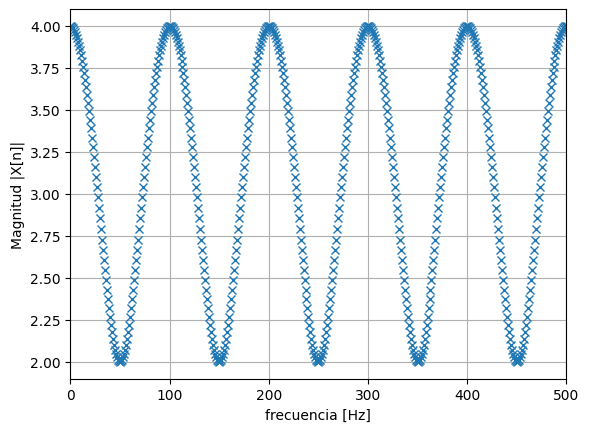

In [19]:
#respuesta al impulso ecuacion 2 
B = np.zeros(N, dtype=float)
for n in range(N):
    if n in range(10):
        B[n] = P[n] 
    else:     
        B[n] = P[n] + 3 * P[n-10] 

Bf = np.fft.fft(B) 
plt.figure()        
plt.plot(bins_impulso, np.abs(Bf), 'x')
plt.grid(True)
plt.xlabel('frecuencia [Hz]') 
plt.ylabel('Magnitud |X[n]|') 
plt.xlim([0, N/2])
plt.show()

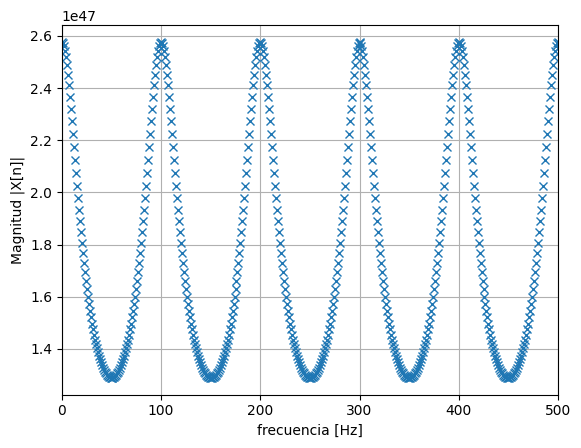

In [20]:
#respuesta al impulso ecuacion 3
G = np.zeros(N, dtype=float)
for n in range(N):
    if n in range(10):
        G[n] = P[n] 
    else:     
        G[n] = P[n] + 3*G[n-10] 

Gf = np.fft.fft(G) 
plt.figure()        
plt.plot(bins_impulso, np.abs(Gf), 'x')
plt.grid(True)
plt.xlabel('frecuencia [Hz]') 
plt.ylabel('Magnitud |X[n]|')     
plt.xlim([0, N/2])
plt.show()


Se observan respuestas en frecuencia periódicas debido a la naturaleza de los sistemas LTI elegidos. 

## **Conclusión**

Se logró observar satisfactoriamente el efecto de desparramo espectral en el gráfico de Densidad Espectral de Potencia como consecuencia del ventaneo implícito mediante una ventana rectangular, así como la potencia unitaria resultante del ajuste de la amplitud de las señales senoidales. 
Además, se comprobó de manera práctica la identidad de Parseval y el aumento de puntos interpolantes generado por la utilización del zero padding, permitiendo una mejor visualización de la DSP.

## **Autoevaluación del aprendizaje**

**Indicar una opción**:
*Resolví la tarea, pero tengo dudas*

**Responder**:

*¿Qué aprendiste al hacer esta tarea? ¿Qué te quedó claro? ¿Qué te sigue costando?*
Logré entender mejor algunos conceptos como desparramo espectral. Me quedó claro Porqué se produce el efecto y cómo se ve en el grafico del espectro de potencias. Me cuesta terminar de comprender el tema de potencia unitaria.  

Indicar si se utilizó IA:

Sí, usé chatGPT y Gemini para terminar de comprender conceptos teóricos.
